**Ashley Bang**

# Pre-processing

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sb    
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
df =pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Check the missing value in percentage

In [5]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
filtered_missing_percentage = missing_percentage[missing_percentage > 0]
print(filtered_missing_percentage)

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


**Dropping features with % over 30**

In [6]:
df.set_index('Id', inplace=True)
df2=df.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC','Fence','MiscFeature', ], axis='columns')
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
# Split features/target
X = df2.drop("SalePrice", axis=1)
y = df2["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Identify types
num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

# Level 1 Models

In [43]:
rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    random_state=42
)

lgbm = LGBMRegressor(
    n_estimators=600,
    learning_rate=0.04,
    objective='regression',
    random_state=42
)

In [44]:
rf_pipe = Pipeline([
    ('preprocess', preprocess),
    ('model', rf)
])

lgbm_pipe = Pipeline([
    ('preprocess', preprocess),
    ('model', lgbm)
])

In [45]:
#train models
rf_pipe.fit(X_train, y_train)
lgbm_pipe.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3166
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 167
[LightGBM] [Info] Start training from score 181441.541952


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [46]:
#Level 1 predictions
pred_rf_train = rf_pipe.predict(X_train)
pred_lgbm_train = lgbm_pipe.predict(X_train)

pred_rf_test = rf_pipe.predict(X_test)
pred_lgbm_test = lgbm_pipe.predict(X_test)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [47]:
#stacked train matrix
X_train_stack = np.column_stack([pred_rf_train, pred_lgbm_train])
X_test_stack = np.column_stack([pred_rf_test, pred_lgbm_test])


# Level 2 Model XGBoost

In [48]:
xgb_meta = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.5,
    colsample_bytree=0.9,
    objective='reg:squarederror',
    random_state=42
)

xgb_meta.fit(X_train_stack, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [49]:
#final predictions
stack_pred = xgb_meta.predict(X_test_stack)

In [50]:
mse = mean_squared_error(y_test, stack_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, stack_pred)
r2 = r2_score(y_test, stack_pred)

print("=== Two-Level Stacked Generalization ===")
print(f"MSE  : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"MAE  : {mae:.3f}")
print(f"R²   : {r2:.3f}")


=== Two-Level Stacked Generalization ===
MSE  : 749098944.000
RMSE : 27369.672
MAE  : 16557.783
R²   : 0.902


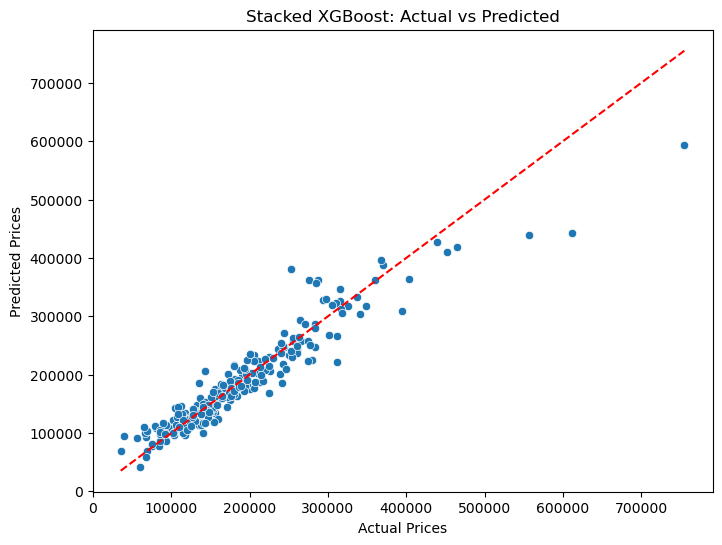

In [55]:
plt.figure(figsize=(8,6))
sb.scatterplot(x=y_test, y=stack_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Stacked XGBoost: Actual vs Predicted")

plt.savefig("stack_gen_plot.png", dpi=300)
plt.show()